## Введение в анализ данных интернет-магазина
Обзор набора данных

Этот блокнот содержит анализ синтетических данных о продажах в интернет-магазине, имитирующих транзакции на платформе электронной коммерции. Набор данных включает 1000 строк с информацией о:

    Демографии клиентов (возраст, пол, город)

    Детализацией товаров (категория, название, цена)

    Историей покупок (дата заказа, количество, метод оплаты)

    Оценками покупателей (рейтинг товара, если оставлен)

Данные были сгенерированы с использованием библиотеки Python Faker, что гарантирует реалистичные значения без риска нарушения конфиденциальности, так как информация не относится к реальным пользователям.
Цели анализа

В этом блокноте мы исследуем данные, чтобы ответить на ключевые вопросы:

    Кто наши клиенты?

        Распределение по возрасту, полу и местоположению.

        Средний чек и частота покупок.

    Что они покупают?

        Популярные категории товаров.

        Тренды в ассортименте.

    Как ведут себя покупатели?

        Предпочтения в способах оплаты.

        Динамика продаж во времени.

        Влияние рейтингов товаров на продажи.

    Потенциал для улучшений

        Выявление товаров с низкими оценками.

        Рекомендации для увеличения продаж.

Методы анализа

В ходе работы мы применим:

    Предобработку данных (проверка на пропуски, аномалии).

    Разведочный анализ (EDA) — визуализация распределений, трендов.

    Статистические методы — корреляции, проверка гипотез.

    Простые модели ML (кластеризация покупателей, предсказание рейтингов).

Описание столбцов
Название столбца	Тип данных	Описание

**customer_id**	Целое число	Уникальный идентификатор клиента (от 10000 до 99999)

**order_date**	Дата	Дата заказа (случайная дата в пределах последнего года)

**product_id**	Целое число	Идентификатор товара (от 100 до 999)

**category_id**	Целое число	Идентификатор категории товара (10, 20, 30, 40 или 50)

**category_name**	Строка	Название категории товара (Электроника, Мода, Дом и быт, Книги и канцтовары, Спорт и отдых)

**product_name**	Строка	Название товара (случайно выбрано из списка товаров соответствующей категории)

**quantity**	Целое число	Количество заказанного товара (от 1 до 5)

**price**	Дробное число	Цена за единицу товара (от 10.00 до 500.00 с двумя знаками после запятой)

**payment_method**	Строка	Способ оплаты (Кредитная карта, Банковский перевод, Наложенный платёж)

**city**	Строка	Город покупателя (сгенерирован методом city() из Faker, зависит от локали)

**review_score**	Целое число	Оценка товара покупателем (от 1 до 5, или None с вероятностью 20%)

**gender**	Строка	Пол покупателя (*М/Ж*, или None с вероятностью 10%)

**age**	Целое число	Возраст покупателя (от 18 до 75 лет)


## Предварительный осмотр данных


In [1]:
# @title импортируем бибилиотеки для работы
import pandas as pd
import numpy as np


In [2]:
# @title загружам таблицу и смотрим на первый 5 строк
sord_df = pd.read_csv(r'D:\Святына цыфрового безумия\synthetic_online_retail_data\synthetic_online_retail_data.csv')
sord_df.head()

,customer_id,order_date,product_id,category_id,category_name,product_name,quantity,price,payment_method,city,review_score,gender,age
0,13542,2024-12-17,784,10,Electronics,Smartphone,2,373.36,Credit Card,New Oliviaberg,1.0,F,56
1,23188,2024-06-01,682,50,Sports & Outdoors,Soccer Ball,5,299.34,Credit Card,Port Matthew,NaN,M,59
2,55098,2025-02-04,684,50,Sports & Outdoors,Tent,5,23.00,Credit Card,West Sarah,5.0,F,64
3,65208,2024-10-28,204,40,Books & Stationery,Story Book,2,230.11,Bank Transfer,Hernandezburgh,5.0,M,34
4,63872,2024-05-10,202,20,Fashion,Skirt,4,176.72,Credit Card,Jenkinshaven,1.0,F,33


In [3]:
# @title првоеряем распределние категориальных данных
sord_df.describe(include=object)

,order_date,category_name,product_name,payment_method,city,gender
count,1000,1000,1000,1000,1000,897
unique,342,5,25,3,962,2
top,2024-08-12,Sports & Outdoors,Yoga Mat,Cash on Delivery,East David,M
freq,10,211,51,374,3,457


In [4]:
# @title првоеряем распределние некатегориальных данных
sord_df.describe()

,customer_id,product_id,category_id,quantity,price,review_score,age
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,799.000000,1000.000000
mean,55490.723000,540.726000,30.030000,2.947000,251.850660,3.992491,46.382000
std,25910.185857,261.737704,14.370303,1.413573,139.194688,1.239469,16.569992
min,10201.000000,100.000000,10.000000,1.000000,10.720000,1.000000,18.000000
25%,33857.000000,311.750000,20.000000,2.000000,128.525000,3.000000,32.000000
50%,54619.500000,542.500000,30.000000,3.000000,250.220000,4.000000,47.000000
75%,77848.500000,770.750000,40.000000,4.000000,366.467500,5.000000,61.000000
max,99923.000000,995.000000,50.000000,5.000000,499.500000,5.000000,75.000000


In [5]:
# @title првоеряем распределние некатегориальных данных

sord_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   customer_id     1000 non-null   int64  
 1   order_date      1000 non-null   object 
 2   product_id      1000 non-null   int64  
 3   category_id     1000 non-null   int64  
 4   category_name   1000 non-null   object 
 5   product_name    1000 non-null   object 
 6   quantity        1000 non-null   int64  
 7   price           1000 non-null   float64
 8   payment_method  1000 non-null   object 
 9   city            1000 non-null   object 
 10  review_score    799 non-null    float64
 11  gender          897 non-null    object 
 12  age             1000 non-null   int64  
dtypes: float64(2), int64(5), object(6)
memory usage: 101.7+ KB


## Очистка данных

In [6]:
# @title переводит date(object) в тип данных date
sord_df['order_date'] = pd.to_datetime(sord_df['order_date'])
print(sord_df['order_date'].dtype)

datetime64[ns]


In [7]:
 # @title првоерка на пропуски
sord_df.isnull().sum()

customer_id         0
order_date          0
product_id          0
category_id         0
category_name       0
product_name        0
quantity            0
price               0
payment_method      0
city                0
review_score      201
gender            103
age                 0
dtype: int64

пропуски замечены в review_score  и gender заменим их по медиане


In [8]:
# @title заполняем прпоуску review_score по медиане
sord_df['review_score'] = sord_df['review_score'].fillna(sord_df['review_score'].median())


In [9]:
# @title заполняем гендер по моде 
# Находим самое частое значение (моду)
most_common_gender = sord_df['gender'].mode()[0]
# Заполняем пропуски
sord_df['gender'] = sord_df['gender'].fillna(most_common_gender)

In [10]:
# @title првоеряем еще раз и прпоусков не обноражено, едем дальше..
sord_df.isnull().sum()

customer_id       0
order_date        0
product_id        0
category_id       0
category_name     0
product_name      0
quantity          0
price             0
payment_method    0
city              0
review_score      0
gender            0
age               0
dtype: int64

## Анализ покупателей

Text(0.5, 1.0, 'Quantity')

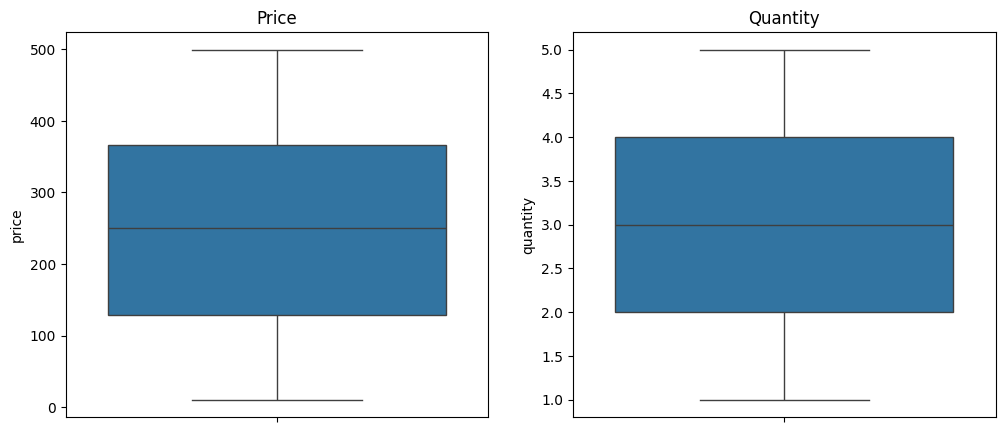

In [11]:
# @title проверка аномалий price  и quantity 
# Провера аномалий заключаеться в поиске отрицательного значение которое может быть в price  и quantity
#  как  мы видем из бокса с усами все значение расположены от 0 до 500 ( как указано) и выбросов зачений нет
import seaborn
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
seaborn.boxplot(sord_df['price'])
plt.title('Price')
plt.subplot(1,2,2)

seaborn.boxplot(sord_df['quantity'])
plt.title('Quantity')

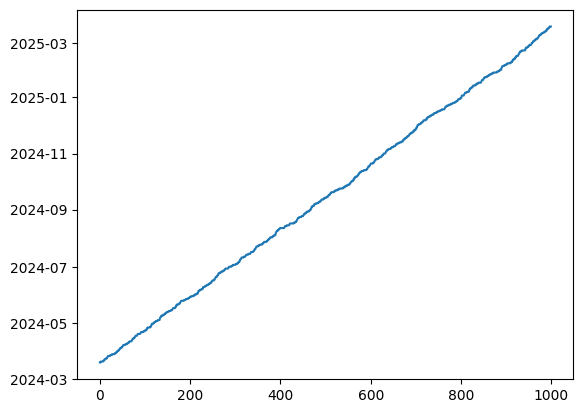

In [12]:
# @title првоерим дата создания ордера не выходит ли за рамки,
# даат создания ордена начинается с марта 2024 и заканчиваеться мартом 2025 , ранних и поздних дат не наблюдаеться
plt.plot(sorted(sord_df['order_date']))


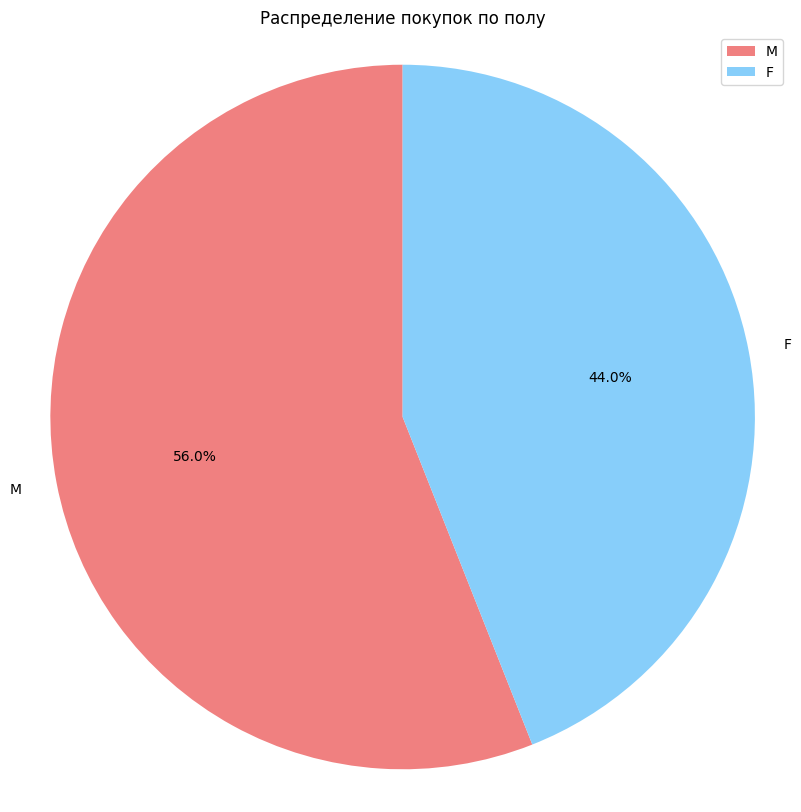

In [13]:
# @title распределение покупой по полу , возрасту и городу 
# на диагарме видно возрат покупателей женского и мужского пола
import matplotlib.pyplot as plt 


plt.figure(figsize=(10,10))
plt.pie(
    sord_df['gender'].value_counts(),
    labels = sord_df['gender'].value_counts().index,
    autopct='%1.1f%%',
    startangle=90,
    colors=['lightcoral', 'lightskyblue']
)
plt.title('Распределение покупок по полу')
plt.axis('equal')
plt.legend()
plt.show()





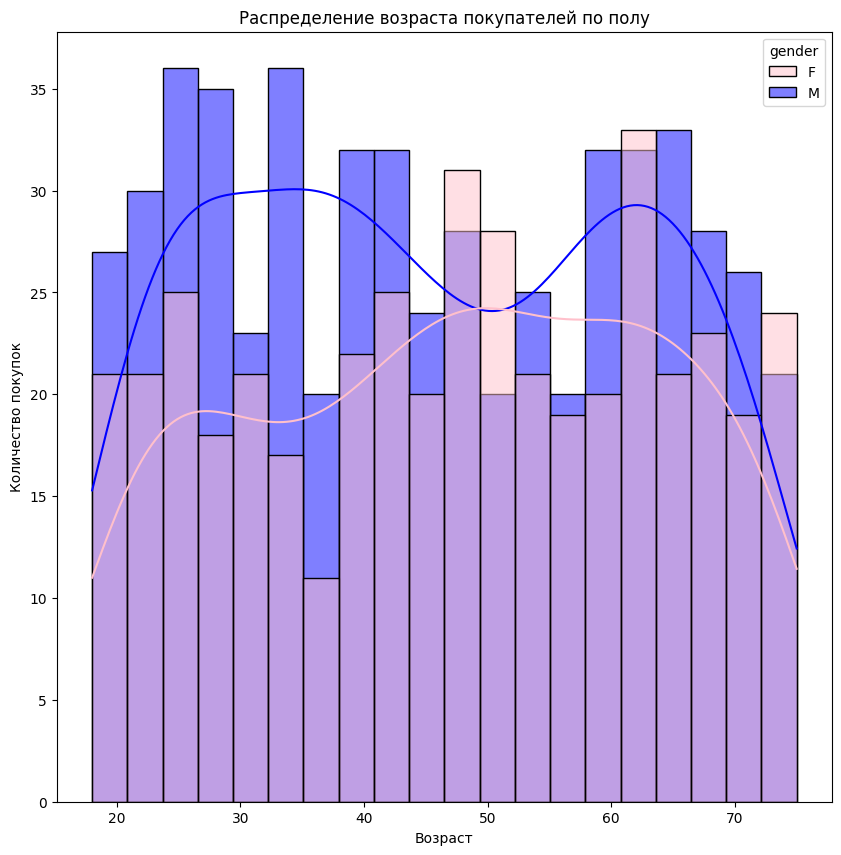

In [14]:
# @title распределние позрастра покупателей 
plt.figure(figsize=(10,10))
seaborn.histplot(
    sord_df,
    x = 'age',
    hue = 'gender',
    bins=20,
    kde=True,
    palette={'M': 'blue', 'F': 'pink'}
)
plt.title('Распределение возраста покупателей по полу')
plt.xlabel('Возраст')
plt.ylabel('Количество покупок')
plt.show()

C:\Users\Jaroslav\AppData\Local\Temp\ipykernel_4136\969142670.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  seaborn.barplot(


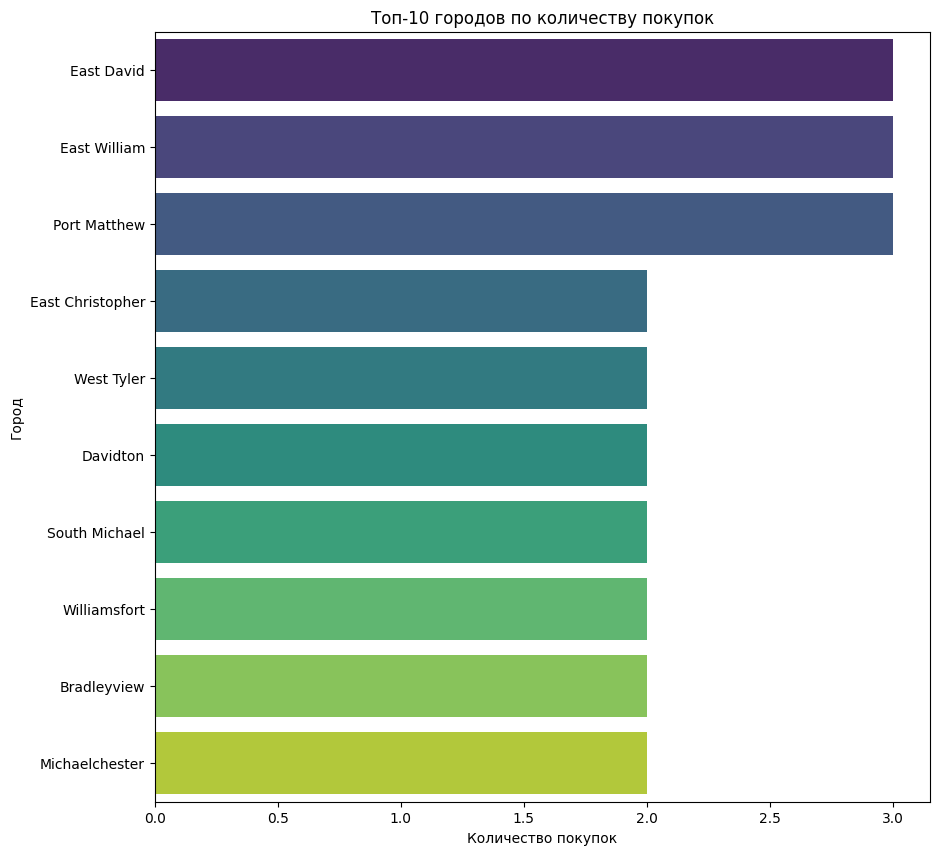

In [15]:
plt.figure(figsize=(10,10))
top_cities = sord_df['city'].value_counts().head(10)
seaborn.barplot(
    x = top_cities.values,
    y = top_cities.index,
    palette='viridis'
)
plt.title('Топ-10 городов по количеству покупок')
plt.xlabel('Количество покупок')
plt.ylabel('Город')
plt.show()

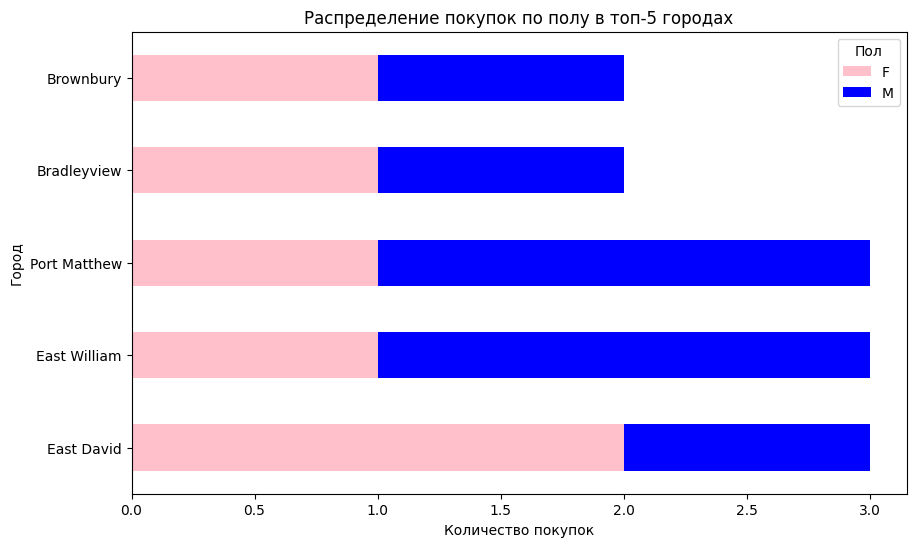

In [16]:
# Группируем данные по городу и полу
city_gender = sord_df.groupby(['city', 'gender']).size().unstack().fillna(0)

# Берем топ-5 городов
top5_cities = city_gender.sum(axis=1).nlargest(5).index
city_gender_top = city_gender.loc[top5_cities]

# Строим stacked bar plot
city_gender_top.plot(
    kind='barh',
    stacked=True,
    figsize=(10, 6),
    color=['pink', 'blue']
)
plt.title('Распределение покупок по полу в топ-5 городах')
plt.xlabel('Количество покупок')
plt.ylabel('Город')
plt.legend(title='Пол')
plt.show()

## Анализ товаров


C:\Users\Jaroslav\AppData\Local\Temp\ipykernel_4136\256522547.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  seaborn.barplot(x=top_products.values, y=top_products.index, palette='viridis')


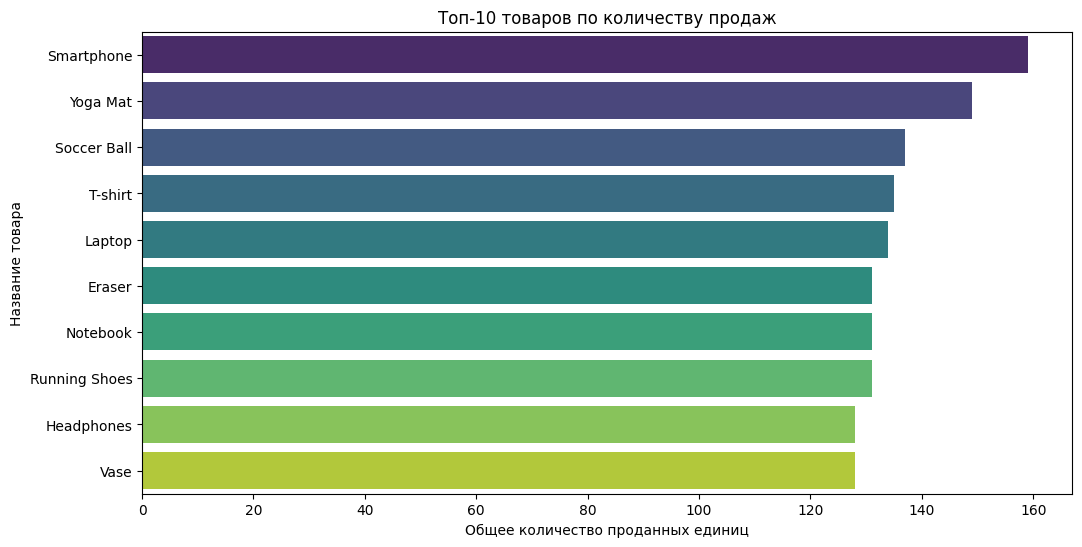

In [17]:
# @title Топ-10 товаров по количеству продаж
top_products = sord_df.groupby('product_name')['quantity'].sum().nlargest(10)


plt.figure(figsize=(12, 6))
seaborn.barplot(x=top_products.values, y=top_products.index, palette='viridis')
plt.title('Топ-10 товаров по количеству продаж')
plt.xlabel('Общее количество проданных единиц')
plt.ylabel('Название товара')
plt.show()

C:\Users\Jaroslav\AppData\Local\Temp\ipykernel_4136\3907938415.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  seaborn.countplot(data=sord_df, y='category_name', palette='Set2', order=sord_df['category_name'].value_counts().index)


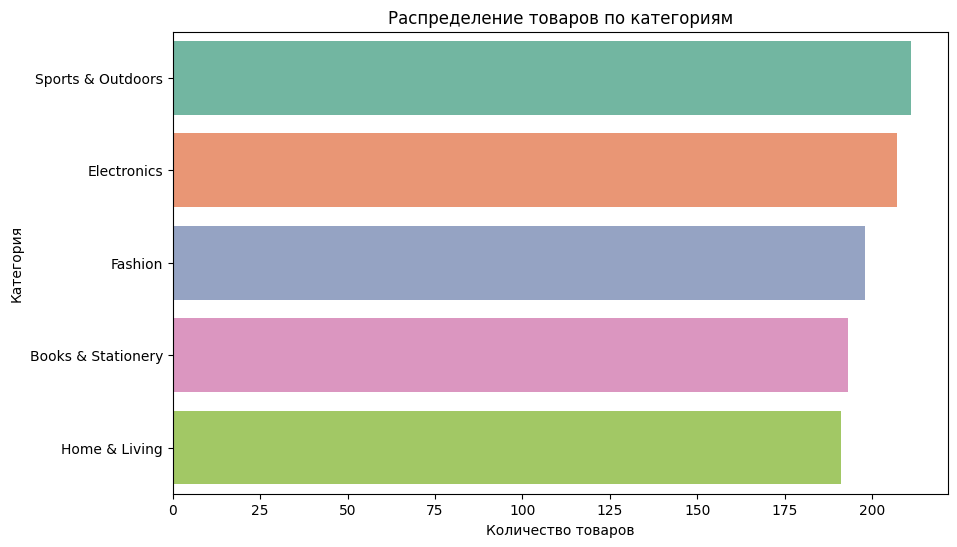

In [18]:
# @title Расределерие товаров по категории
plt.figure(figsize=(10, 6))
seaborn.countplot(data=sord_df, y='category_name', palette='Set2', order=sord_df['category_name'].value_counts().index)
plt.title('Распределение товаров по категориям')
plt.xlabel('Количество товаров')
plt.ylabel('Категория')
plt.show()

C:\Users\Jaroslav\AppData\Local\Temp\ipykernel_4136\1585426028.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  seaborn.barplot(x=top_revenue.values, y=top_revenue.index, palette='rocket')


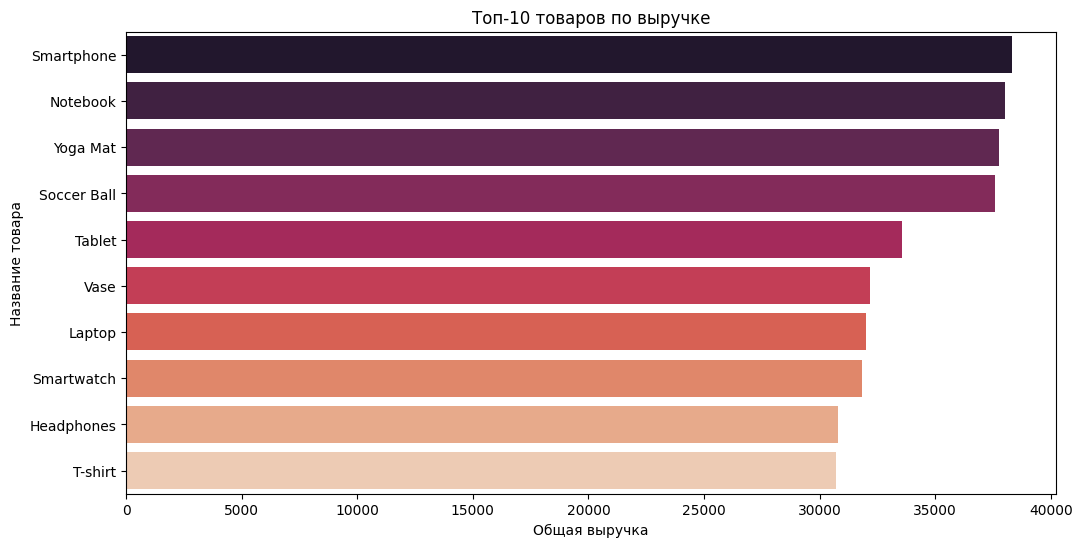

In [19]:
# @title Товары с максимальной выручкой
sord_df['revenue'] = sord_df['price'] * sord_df['quantity']
top_revenue = sord_df.groupby('product_name')['revenue'].sum().nlargest(10)

plt.figure(figsize=(12, 6))
seaborn.barplot(x=top_revenue.values, y=top_revenue.index, palette='rocket')
plt.title('Топ-10 товаров по выручке')
plt.xlabel('Общая выручка')
plt.ylabel('Название товара')
plt.show()

C:\Users\Jaroslav\AppData\Local\Temp\ipykernel_4136\2311373637.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  seaborn.boxplot(data=sord_df, x='category_name', y='price', palette='Set3')


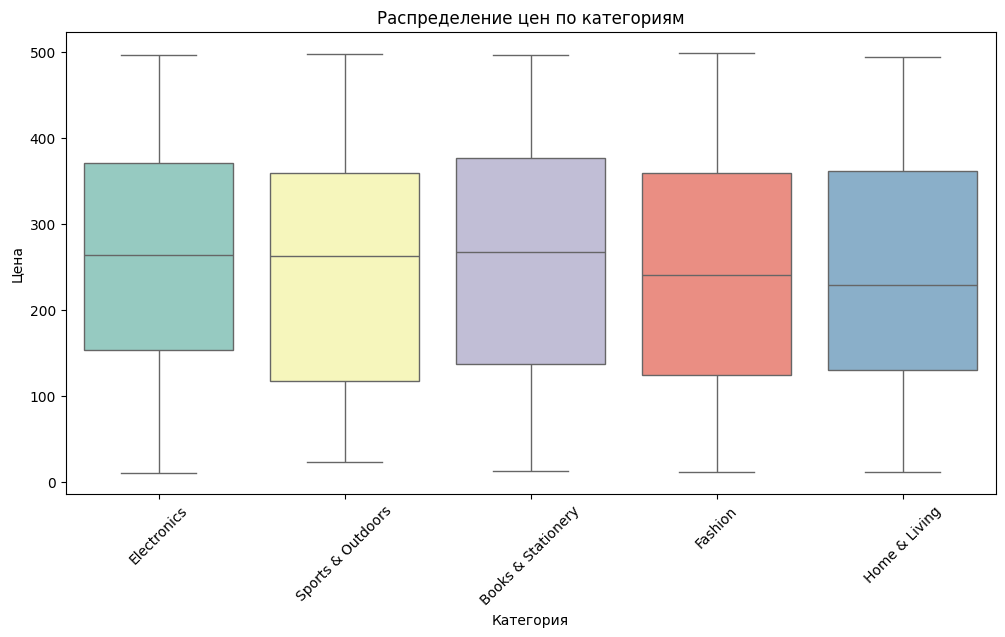

In [20]:
# @title Анализ ценового распределения по категориям
plt.figure(figsize=(12, 6))
seaborn.boxplot(data=sord_df, x='category_name', y='price', palette='Set3')
plt.title('Распределение цен по категориям')
plt.xlabel('Категория')
plt.ylabel('Цена')
plt.xticks(rotation=45)
plt.show()

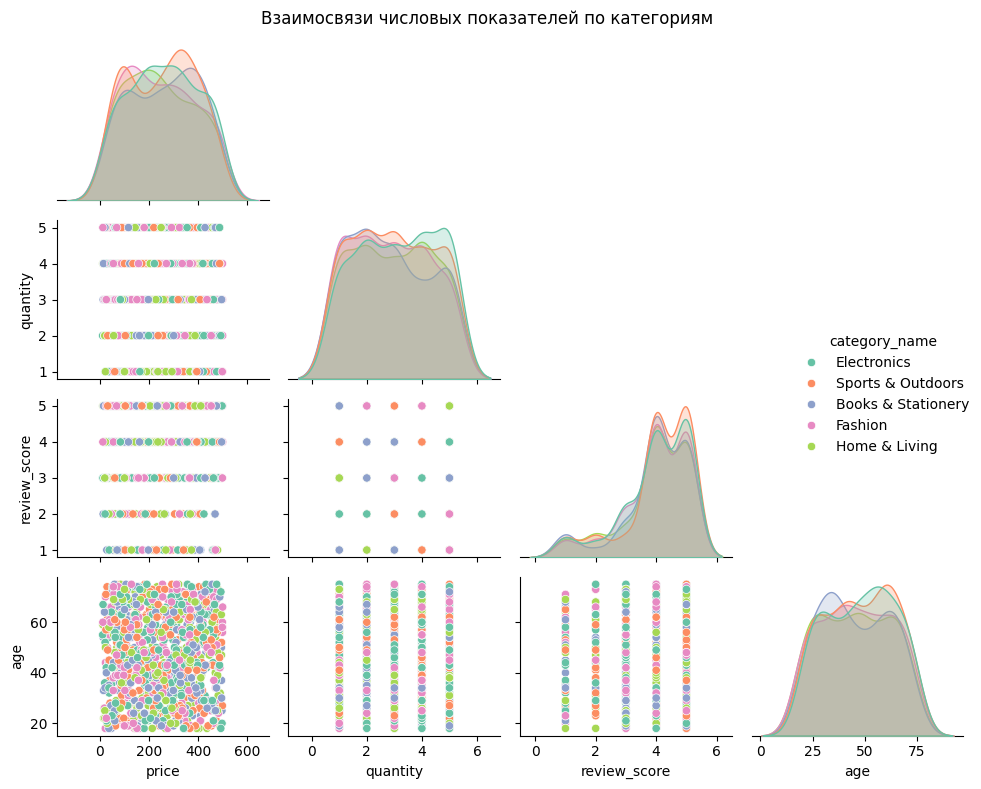

In [21]:
# @title Анализ связей
num_cols = ['price', 'quantity', 'review_score', 'age']
seaborn.pairplot(
    data=sord_df[num_cols + ['category_name']].dropna(),
    hue='category_name',
    corner=True,
    palette='Set2',
    height=2
)
plt.suptitle('Взаимосвязи числовых показателей по категориям')
plt.tight_layout()
plt.show()

## Оценки и обратная связь


In [22]:
# Группируем по товарам и считаем средний рейтинг
product_reviews = sord_df.groupby('product_name')['review_score'].agg(['mean', 'count'])

In [23]:
# Фильтруем товары с достаточным количеством оценок
min_reviews = 10
filtered_products = product_reviews[product_reviews['count'] >= min_reviews]

In [24]:
# Берем топ-15 товаров
top_products = filtered_products.nlargest(15, 'mean')

C:\Users\Jaroslav\AppData\Local\Temp\ipykernel_4136\3280224004.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  seaborn.barplot(


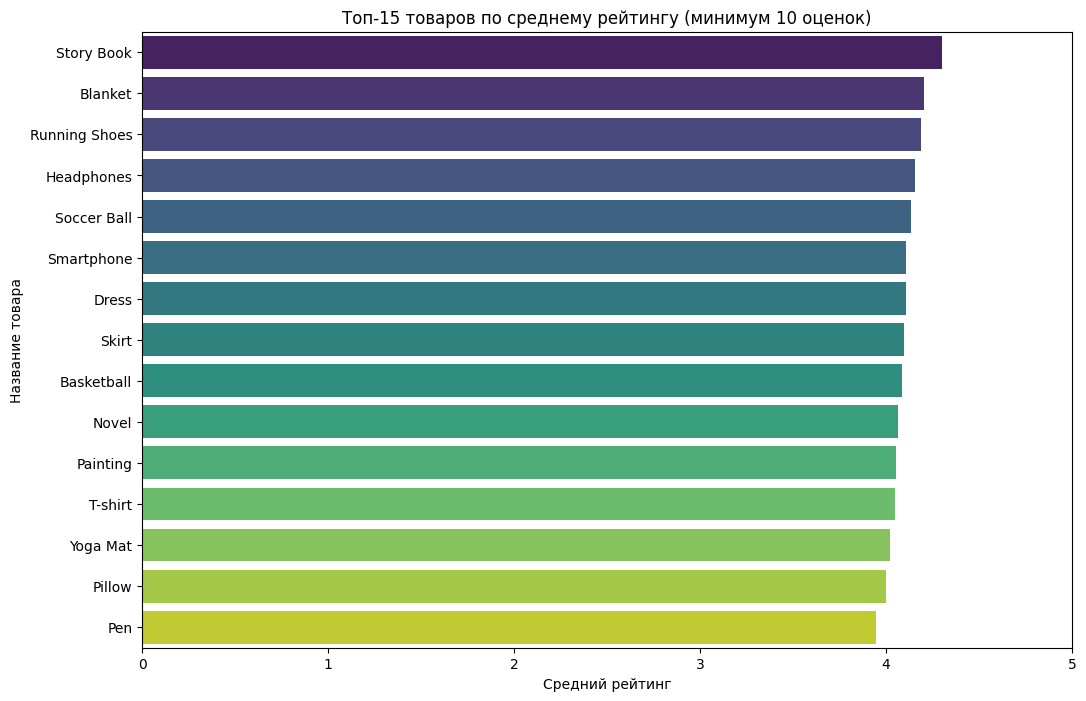

In [25]:
# @title Топ товаров по среднему рейтингу (минимум 10 оценок)
plt.figure(figsize=(12, 8))
seaborn.barplot(
    x='mean', 
    y=top_products.index, 
    data=top_products,
    palette='viridis'
)
plt.title(f'Топ-15 товаров по среднему рейтингу (минимум {min_reviews} оценок)')
plt.xlabel('Средний рейтинг')
plt.ylabel('Название товара')
plt.xlim(0, 5)
plt.show()

C:\Users\Jaroslav\AppData\Local\Temp\ipykernel_4136\2542136007.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  seaborn.boxplot(


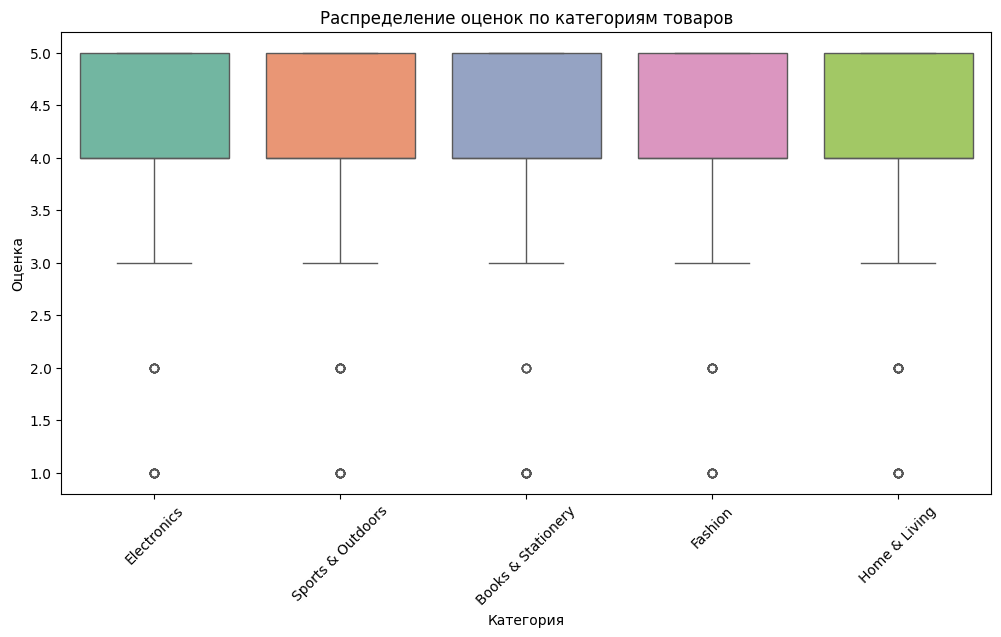

In [26]:
# @title Распределение оценок по категориям
plt.figure(figsize=(12, 6))
seaborn.boxplot(
    data=sord_df,
    x='category_name',
    y='review_score',
    palette='Set2'
)
plt.title('Распределение оценок по категориям товаров')
plt.xlabel('Категория')
plt.ylabel('Оценка')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# @title Сравнение средних оценок (review_score) между категориями (Тест: ANOVA или Краскела-Уоллиса (для ненормального распределения))

from scipy import stats

# Проверка нормальности распределения оценок
print(stats.shapiro(sord_df['review_score'].dropna()))

# Если p-value > 0.05 (нормальное распределение):
stats.f_oneway(
    *[group['review_score'].values 
      for name, group in sord_df.groupby('category_name')]
)

# Если распределение ненормальное:
stats.kruskal(
    *[group['review_score'].values 
      for name, group in sord_df.groupby('category_name')]
)

ShapiroResult(statistic=np.float64(0.7868836718306645), pvalue=np.float64(3.375918913257473e-34))


KruskalResult(statistic=np.float64(2.6618222778365346), pvalue=np.float64(0.615911557629406))

Тест Шапиро-Уилка на нормальность распределения оценок (review_score)

Результат:

    statistic = 0.787 (чем ближе к 1, тем ближе распределение к нормальному)

    p-value = 3.38e-34 (крайне мало, p < 0.05)

Интерпретация:

    Гипотеза о нормальности распределения отвергается.

    Оценки покупателей не распределены нормально → следует использовать непараметрические тесты (например, Краскела-Уоллиса вместо ANOVA).
    
Тест Краскела-Уоллиса (сравнение оценок между категориями товаров)

Результат:

    statistic = 2.66

    p-value = 0.616 (p > 0.05)

Интерпретация:

    Нет статистически значимых различий в оценках (review_score) между категориями товаров.

    Гипотеза о том, что хотя бы одна категория отличается по среднему рейтингу, не подтвердилась.

In [ ]:
# @title  Сравнение средних цен между категориями (Тест: ANOVA с пост-хок тестом Тьюки)
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# ANOVA
tukey = pairwise_tukeyhsd(
    endog=sord_df['price'],
    groups=sord_df['category_name'],
    alpha=0.05
)
tukey.plot_simultaneous()
plt.show()

In [30]:
# @title Проверка связи между ценой и оценкой товара (Тест: Корреляция Спирмена (непараметрическая))
corr, p_value = stats.spearmanr(
    sord_df['price'],
    sord_df['review_score'].fillna(0)
)
print(f"Корреляция: {corr:.3f}, p-value: {p_value:.4f}")

Корреляция: 0.066, p-value: 0.0369


Вывод по корреляции Спирмена:

Результат:

    Слабая положительная корреляция: 0.066

    Статистически значимо: p-value = 0.037 (p < 0.05)

Интерпретация:

    Существует очень слабая, но статистически значимая связь между ценой товара и его оценкой.

    С ростом цены оценки немного повышаются, но эффект минимален (коэффициент близок к 0).

Практический смысл:

    Цена практически не влияет на удовлетворенность покупателей.

    Дорогие товары не гарантируют высоких оценок, а дешевые — низких.

Рекомендация:

    Изучить другие факторы, влияющие на оценки (качество, доставка, упаковка).

    Для точного анализа лучше применить многомерную регрессию, учитывающую несколько переменных.

In [31]:
# @title Сравнение количества покупок между мужчинами и женщинами (Тест: U-тест Манна-Уитни (непараметрический))
male = sord_df[sord_df['gender'] == 'M']['quantity']
female = sord_df[sord_df['gender'] == 'F']['quantity']

stats.mannwhitneyu(male, female)

MannwhitneyuResult(statistic=np.float64(124480.0), pvalue=np.float64(0.7732869210105382))

In [ ]:
# @title Анализ зависимости метода оплаты от возраста (Тест: Критерий Краскела-Уоллиса)
stats.kruskal(
    *[group['age'].values 
      for name, group in sord_df.groupby('payment_method')]
)

In [ ]:
# @title Проверка сезонности продаж (Тест: Автокорреляция (statsmodels))
from statsmodels.tsa.stattools import acf

# Сначала агрегируйте данные по дням/неделям
daily_sales = sord_df.groupby('order_date')['quantity'].sum()
autocorr = acf(daily_sales, fft=True)
plt.stem(autocorr)
plt.show()

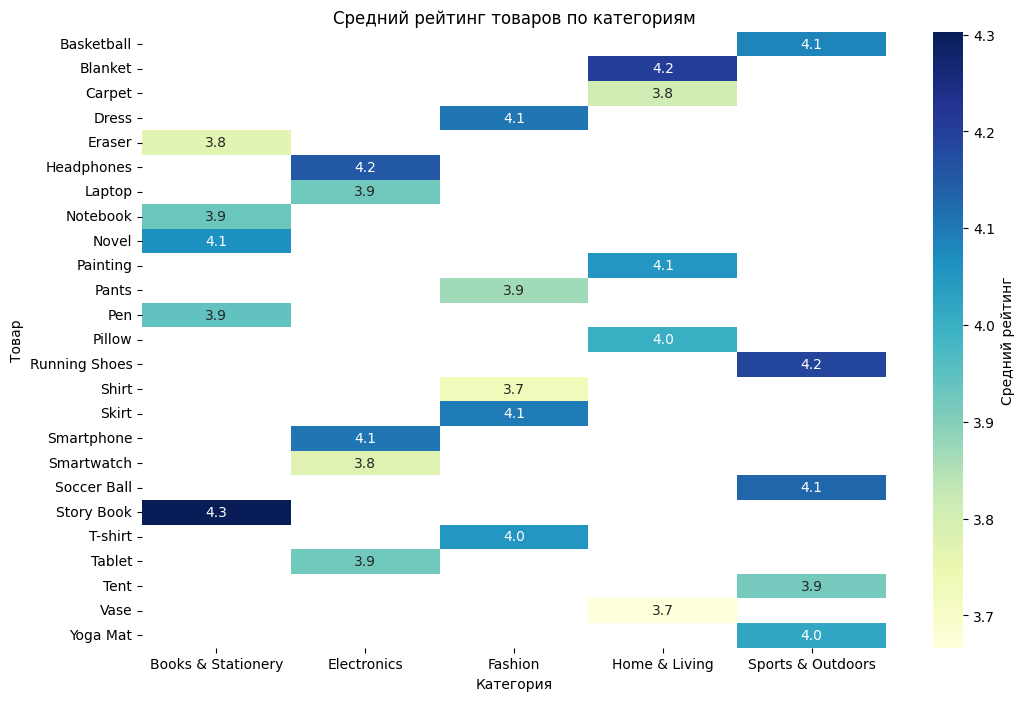

In [28]:
# @title Тепловая карта: средний рейтинг товаров в категориях
heatmap_data = sord_df.pivot_table(
    index='product_name',
    columns='category_name',
    values='review_score',
    aggfunc='mean'
)

plt.figure(figsize=(12, 8))
seaborn.heatmap(
    heatmap_data,
    cmap='YlGnBu',
    annot=True,
    fmt='.1f',
    cbar_kws={'label': 'Средний рейтинг'}
)
plt.title('Средний рейтинг товаров по категориям')
plt.xlabel('Категория')
plt.ylabel('Товар')
plt.show()